# Predicting Bike Rentals

This notebook tries to predict the total number of bike rentals per hour on a single day using the dataset compiled by Hadi Fanaee-T. You can download it from the [University of California, Irvine's website](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset).

In [1]:
import pandas as pd
bike_rental = pd.read_csv("data-sets/bike_rental_hour.csv")
bike_rental.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


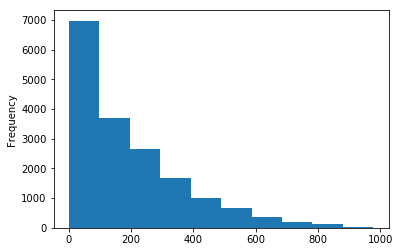

In [28]:
#plot a histrogram of the cnt column
#to take a look of the distribution of total rentals

import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(bike_rental["cnt"])
plt.ylabel("Frequency")
plt.show()

In [3]:
bike_rental.corr()["cnt"]

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [27]:
'''We created the "time label" feature engineering converting 
   the 24-hour format into four 6-hour groups'''

def assign_label(hour):
    #Assigns labels based on hours
    #1- Morning, 2- Afternoon, 3- Evening, 4- Night
    if hour >= 0 and hour < 6:
        return 4
    elif hour >= 6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >= 18 and hour <= 24:
        return 3

bike_rental["time_label"] = bike_rental["hr"].apply(assign_label)

## Deciding on a metric

Before training our model, we will split the data into train and test sets. We will use columns within the data to generate a list of features for our target label and drop the unneeded ones.   

We will use the regression metric, mean squared error since we are making predictions on variables that are numeric and continuous. With the train and test sets created, the linear regression model will be created, trained, and tested.

In [5]:
from sklearn.linear_model import LinearRegression
import numpy as np

#create train and test set
train = bike_rental.sample(frac=.8)
test = bike_rental.loc[~bike_rental.index.isin(train.index)]

#arrange the columns we want for regression
predict_list = list(train.columns)
remove_cols = {"cnt", "dteday", "casual", "registered"}
predict_list = [train_cols for train_cols in predict_list if train_cols not in remove_cols]

In [17]:
model = LinearRegression()
model.fit(train[predict_list], train["cnt"])
predictions = model.predict(test[predict_list])
mse = np.mean((predictions - test["cnt"]) ** 2)
rmse = mse ** .5
print("Mean Squared Error: {0}".format(mse))
print("Root Squared Error: {0}".format(rmse))

Mean Squared Error: 18170.074692270962
Root Squared Error: 134.79641943416362


## Findings
The error value is high compared to the prediction values. The dataset has a few exceptionally high bike rentals. The MSE computes these values and penalizes them leading to a higher score.  

## Decision Tree Model

Both train and test sets applied to the Decision Tree to see if it is more accurate compared to the Linear model. After training and testing the initial model, we will use another Decision Tree model and tweak its hyperparameters to gauge for more accuracy.

In [22]:
from sklearn.tree import DecisionTreeRegressor

#create a decision tree model, train and test it
regression = DecisionTreeRegressor()
regression.fit(train[predict_list], train["cnt"])
predict = regression.predict(test[predict_list])
mse = np.mean((predict - test["cnt"]) ** 2)
rmse = mse ** .5

print("Decision Tree Regression Results")
print("Mean Squared Error: {0}".format(mse))
print("Root Squared Error: {0}".format(rmse))
print("\n")

#tweak model to improve accuracy
regression = DecisionTreeRegressor(min_samples_leaf=15, max_depth=20)
regression.fit(train[predict_list], train["cnt"])
predict = regression.predict(test[predict_list])
mse = np.mean((predict - test["cnt"]) ** 2)
rmse = mse ** .5

print("Tweaked Decision Tree Regression Results")
print("Mean Squared Error: {0}".format(mse))
print("Root Squared Error: {0}".format(rmse))

Decision Tree Regression Results
Mean Squared Error: 3131.186996547756
Root Squared Error: 55.957010253834646


Tweaked Decision Tree Regression Results
Mean Squared Error: 2844.7562939570257
Root Squared Error: 53.33625684238655


## Findings - Decision Tree Error
The decision tree seems to be more reliable in estimating predictions compared to the linear model due to the model complexity.

## Random Forest Model

Similar to the model above, we will train and test the data to the Random Forest model in hopes to get a more accurate prediction.

In [25]:
from sklearn.ensemble import RandomForestRegressor

#create a random forest model, train and test it
rf = RandomForestRegressor()
rf.fit(train[predict_list], train["cnt"])
predict = rf.predict(test[predict_list])
mse = np.mean((predict - test["cnt"]) ** 2)
rmse = mse ** .5

print("Random Forest Regression Results")
print("Mean Squared Error: {0}".format(mse))
print("Root Squared Error: {0}".format(rmse))
print("\n")

#tweak model hoping to get a more accurate prediction
rf = RandomForestRegressor(min_samples_leaf=5, max_depth=10)
rf.fit(train[predict_list], train["cnt"])
predict = rf.predict(test[predict_list])
mse = np.mean((predict - test["cnt"]) ** 2)
rmse = mse ** .5

print("Tweaked Random Forest Regression Results")
print("Mean Squared Error: {0}".format(mse))
print("Root Squared Error: {0}".format(rmse))

Random Forest Regression Results
Mean Squared Error: 1746.537839470652
Root Squared Error: 41.79160010660817


Tweaked Random Forest Regression Results
Mean Squared Error: 2452.4316511041343
Root Squared Error: 49.52203197672864


## Findings - Random Forest Error

The random forest model improved the accuracy immensely in comparison to the decision tree model by removing some sources of overfitting. However, tweaking the model led to a more unfortunate outcome. More time could be spent tuning the hyperparameters to increase the model's accuracy.